In [ ]:
#|default_exp app

In [2]:
#|export
from fastai.vision.all import *
import gradio as gr

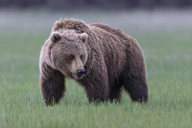

In [4]:
im = PILImage.create('images/grizzly.jpg')
im.thumbnail((192,192))
im

In [20]:
#|export
# Copied from https://n90l9ahmyv.clg07azjl.paperspacegradient.com/lab/tree/bear_multicat.ipynb

# from parent_label
def get_y(o):
    parent_name = Path(o).parent.name
    if parent_name in bear_types:
        return [parent_name]
    return []

In [7]:
#|export
learn = load_learner('bear_multicat.pkl') #'export.pkl')

In [8]:
learn.predict(im)

((#1) ['grizzly'],
 tensor([False,  True, False]),
 tensor([1.2435e-04, 1.0000e+00, 9.2345e-04]))

In [9]:
#|export
categories = ('black', 'grizzly', 'teddy')

def classify_image(im):
    pred, idx, probs = learn.predict(im)
    return dict(zip(categories, map(float, probs)))

In [10]:
classify_image(im)

{'black': 0.0001243527658516541,
 'grizzly': 0.9999984502792358,
 'teddy': 0.0009234462631866336}

In [13]:
#|export
image = gr.Image(width=192, height=192)
label = gr.Label()
examples = ['images/grizzly.jpg', 'images/black.jpg', 'images/teddy.jpg',
            'images/grizzly_black.jpg',
            'images/text.png', 'images/einstein.png', 'images/dunno.jpg']

intf = gr.Interface(fn=classify_image, inputs=image, outputs=label, examples=examples)
intf.launch(inline=False)

Running on local URL:  http://127.0.0.1:7862

To create a public link, set `share=True` in `launch()`.


In [14]:
import nbdev

In [21]:
nbdev.export.nb_export('app.ipynb')